Promedio de satisfacción por ciudad: Ciudad
Barcelona    4.979928
Madrid       5.073787
Portugal     4.997207
Valencia     4.946667
Name: Satisfacción Cliente, dtype: float64

 Promedio Compradores por Genero: Genero Comprador
F    151.589480
M    149.343986
Name: Unidades Vendidas, dtype: float64

--- Estadísticas Básicas ---

            Precio  Unidades Vendidas  Satisfacción Cliente  \
count  10000.00000       10000.000000          10000.000000   
mean    1028.29760         150.458200              4.998800   
std      570.63456          85.642209              2.611452   
min       50.00000           1.000000              1.000000   
25%      525.00000          77.000000              3.000000   
50%     1033.00000         151.000000              5.000000   
75%     1535.00000         224.000000              7.000000   
max     1999.00000         299.000000              9.000000   

       Tiempo de Envío (días)   Total Ventas  
count            10000.000000   10000.000000  
mean    

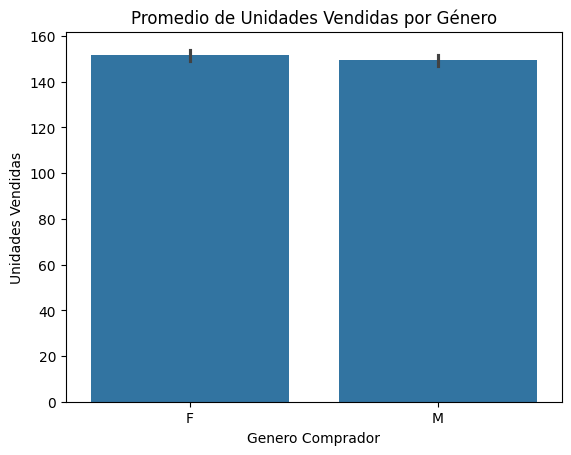

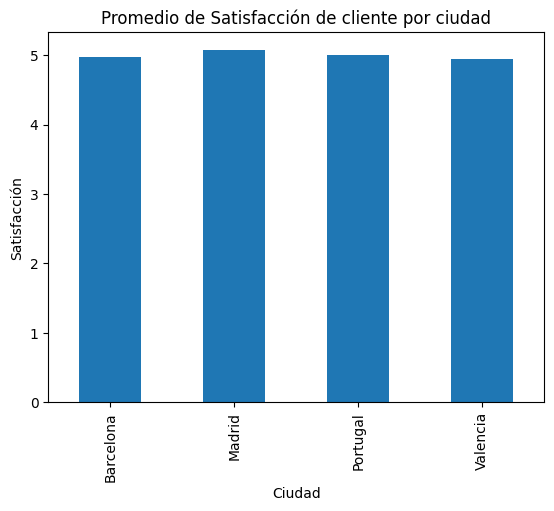

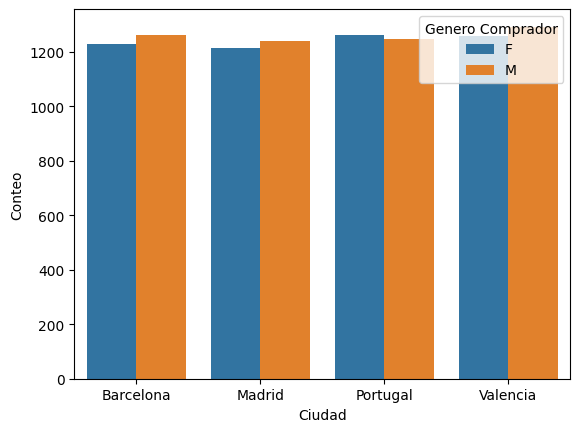

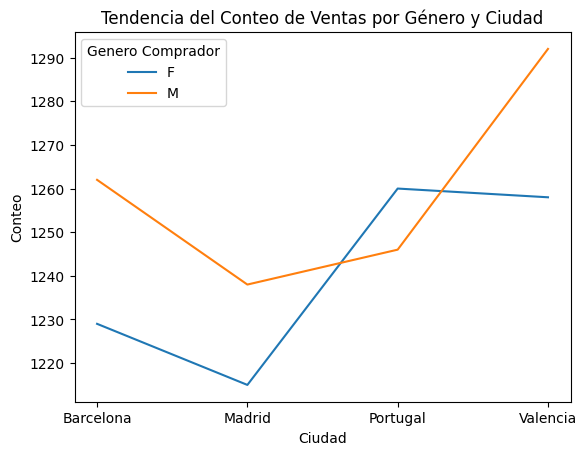

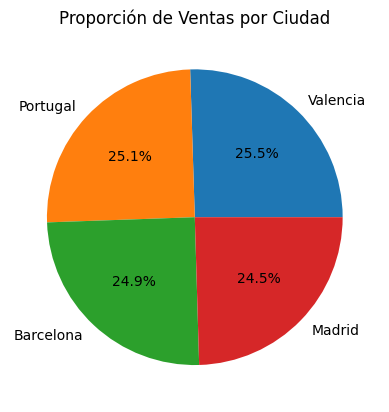

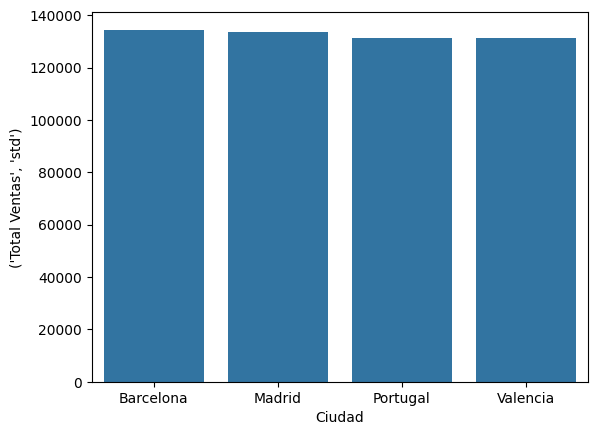

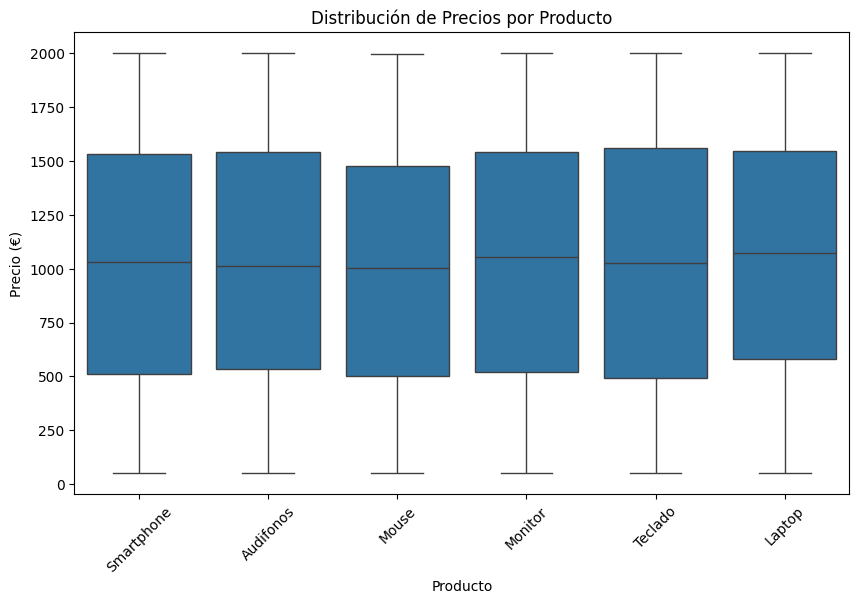

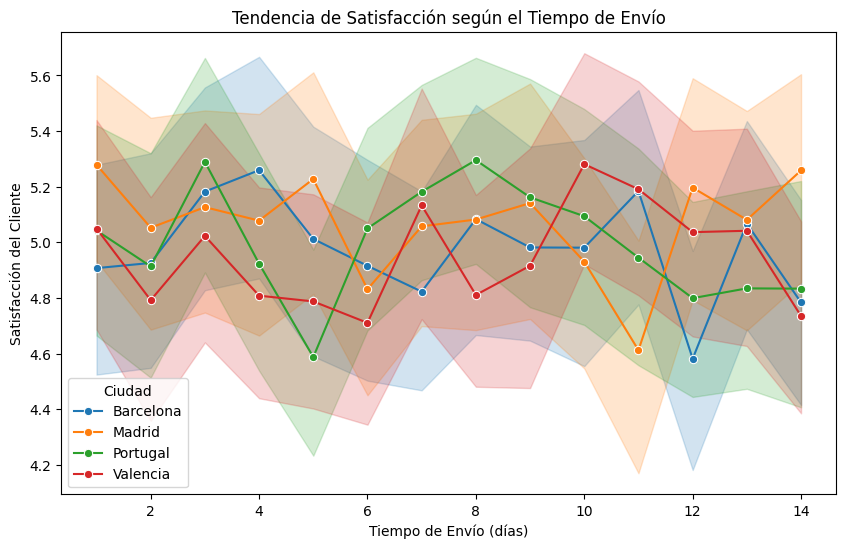

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

producto = ['Laptop', 'Smartphone', 'Audifonos', 'Monitor', 'Teclado', 'Mouse']
ciudades = ['Madrid', 'Barcelona', 'Portugal', 'Valencia',]
generos = ['F', 'M']
num_datos = 10000

datos_ventas = {
    'Producto': np.random.choice(producto, num_datos),
    'Precio': np.random.randint(50, 2000, num_datos),
    'Unidades Vendidas': np.random.randint(1, 300, num_datos),
    'Ciudad': np.random.choice(ciudades, num_datos),
    'Genero Comprador': np.random.choice(generos, num_datos),
    'Satisfacción Cliente': np.random.randint(1, 10, num_datos),
    'Tiempo de Envío (días)': np.random.randint(1, 15, num_datos)
}

df_ventas = pd.DataFrame(datos_ventas)

df_ventas['Total Ventas'] = df_ventas['Precio'] * df_ventas['Unidades Vendidas']
#df_ventas = df_ventas.sort_values(by=['Unidades Vendidas'], ascending=True)
#print(df_ventas)

df_ventas.to_csv('datos_ventas.csv')

#Promedio de satisfacción de clinete para cada ciudad

# Agrupa el DataFrame por la columna ciudad.
ciudades_agrupadas = df_ventas.groupby('Ciudad')
# Selecciona la columna ['Satisfacción Cliente'] y calcula el promedio de los valOores de la columna con mean()
promedio_satisfaccion = ciudades_agrupadas['Satisfacción Cliente'].mean()
print(f'Promedio de satisfacción por ciudad: {promedio_satisfaccion}')

#Promedio de unidades vendidas para compradores femeninos y masculinos

promedio_compradores = df_ventas.groupby(['Genero Comprador'])['Unidades Vendidas'].mean()
print(f'\n Promedio Compradores por Genero: {promedio_compradores}')

# 1. Estadísticas básicas
print("\n--- Estadísticas Básicas ---\n")
print(df_ventas.describe())
df_ventas.describe().to_csv('estadisticas_basicas.csv')


# 2. Estadísticas por ciudad
print("\n--- Estadísticas por Ciudad ---\n")
estadisticas_ciudad = df_ventas.groupby('Ciudad').agg({
    'Total Ventas': ['mean', 'sum', 'min', 'std'],
    'Unidades Vendidas': ['sum', 'min', 'max']
}).reset_index()
print(estadisticas_ciudad)
estadisticas_ciudad.to_csv('estadisticas_por_ciudad.csv')

#CREANDO GRAFICOS

sns.barplot(x = 'Genero Comprador', y = 'Unidades Vendidas', data = df_ventas)
plt.title('Promedio de Unidades Vendidas por Género')
plt.show()

promedio_satisfaccion.plot(kind='bar')
plt.title('Promedio de Satisfacción de cliente por ciudad')
plt.ylabel('Satisfacción')
plt.show()

conteo_genero_ciudad = df_ventas.groupby(['Ciudad','Genero Comprador']).size().reset_index(name='Conteo')
sns.barplot(x = 'Ciudad', y = 'Conteo', hue='Genero Comprador', data = conteo_genero_ciudad)
plt.show()

# CORRECCIÓN para plot (graficar líneas)
sns.lineplot(x='Ciudad', y='Conteo', hue='Genero Comprador', data=conteo_genero_ciudad)
plt.title('Tendencia del Conteo de Ventas por Género y Ciudad')
plt.show()

ventas_por_ciudad = df_ventas['Ciudad'].value_counts()
plt.pie(ventas_por_ciudad, labels=ventas_por_ciudad.index, autopct='%1.1f%%')
plt.title('Proporción de Ventas por Ciudad')
plt.show()

sns.barplot(x = 'Ciudad', y = ('Total Ventas', 'std'), data = estadisticas_ciudad)
plt.show()

# 4. Boxplot: Distribución de precios por producto
plt.figure(figsize=(10, 6))
sns.boxplot(x='Producto', y='Precio', data=df_ventas)
plt.title('Distribución de Precios por Producto')
plt.ylabel('Precio (€)')
plt.xticks(rotation=45)
plt.show()

# 7. Gráfico de líneas: Tendencias de satisfacción del cliente a lo largo del tiempo de envío
plt.figure(figsize=(10, 6))
sns.lineplot(x='Tiempo de Envío (días)', y='Satisfacción Cliente', hue='Ciudad', data=df_ventas, marker='o')
plt.title('Tendencia de Satisfacción según el Tiempo de Envío')
plt.xlabel('Tiempo de Envío (días)')
plt.ylabel('Satisfacción del Cliente')
plt.show()

